### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect there to be a correlation between the two columns?
- Create a contigency table. Do you observe different ratios between categories here?
- Create a bar plot for this contigency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
vg = pd.read_csv('vgsales.csv')
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


I'm going to choose Genre and Platform. There might be a corellation between which platform can make use of a certain genre. For example, loads of people prefer a mouse for shooting games, or a controller for platformers.

In [3]:
table = vg.groupby(['Genre', 'Platform']).size().unstack('Platform', fill_value=0)
table

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,61,0,182,3,343,6,167,101,3,0,...,3,0,12,0,0,238,63,324,155,68
Adventure,2,1,37,11,240,5,38,20,2,0,...,26,0,4,1,0,84,3,47,26,12
Fighting,2,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,42,5,65,48,7
Misc,5,0,53,0,393,8,110,36,1,0,...,15,2,17,0,0,280,21,126,46,15
Platform,9,0,28,2,92,19,142,73,7,1,...,5,1,26,0,0,58,16,24,49,4
Puzzle,11,1,20,0,238,15,41,13,0,0,...,5,0,13,0,0,55,4,7,7,0
Racing,6,0,11,6,67,2,64,63,1,0,...,8,1,9,0,0,94,3,105,123,19
Role-Playing,0,0,86,4,200,21,73,27,3,0,...,17,1,50,0,4,35,6,76,23,13
Shooter,24,0,7,3,42,1,40,48,1,0,...,22,0,10,1,0,66,10,203,132,33


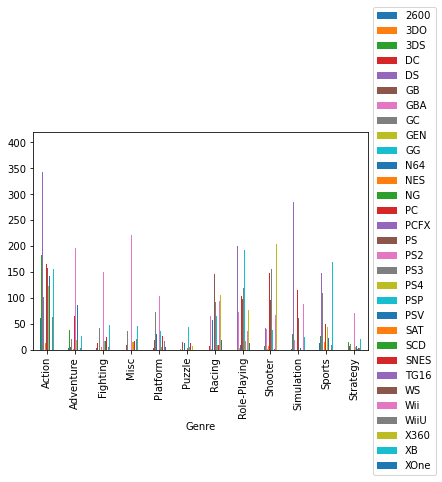

In [4]:
table.plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

Reading data from this is going to be very hard, but you can definitely see some correlation.

In [5]:
from scipy.stats import chi2_contingency
chi2_contingency(table)

(5909.978728846863,
 0.0,
 330,
 array([[2.65711532e+01, 5.99349319e-01, 1.01689601e+02, 1.03887215e+01,
         4.32130859e+02, 1.95787444e+01, 1.64221713e+02, 1.11079407e+02,
         5.39414387e+00, 1.99783106e-01, 6.37308109e+01, 1.95787444e+01,
         2.39739728e+00, 1.91791782e+02, 1.99783106e-01, 2.38940595e+02,
         4.31731293e+02, 2.65511748e+02, 6.71271237e+01, 2.42336908e+02,
         8.25104229e+01, 3.45624774e+01, 1.19869864e+00, 4.77481624e+01,
         3.99566213e-01, 1.19869864e+00, 2.64712616e+02, 2.85689842e+01,
         2.52725630e+02, 1.64621280e+02, 4.25538017e+01],
        [1.03047355e+01, 2.32437643e-01, 3.94369201e+01, 4.02891915e+00,
         1.67587541e+02, 7.59296301e+00, 6.36879142e+01, 4.30784432e+01,
         2.09193879e+00, 7.74792144e-02, 2.47158694e+01, 7.59296301e+00,
         9.29750572e-01, 7.43800458e+01, 7.74792144e-02, 9.26651404e+01,
         1.67432582e+02, 1.02969876e+02, 2.60330160e+01, 9.39822870e+01,
         3.19989155e+01, 1.3403904

So it seems the score of my chi-squared test is 5900, that's an awfully big number. I'm assuming the test is very confident there is a correlation between these two categorical sets.